In [2]:
# Paso 1: Cargar el dataset desde el mismo directorio
# Usamos read.table para leer los datos desde un archivo de texto.
# El argumento header=TRUE indica que la primera fila contiene los nombres de las columnas.
# stringsAsFactors=TRUE convierte las columnas de texto en factores.
# sep="" usa el separador por defecto (espacio o tabulación).
# na.strings="NA" identifica los valores faltantes.
# dec="." indica el punto como separador decimal.
# strip.white=TRUE elimina espacios en blanco extra.
# row.names="NOMBRE" usa la columna 'NOMBRE' como identificador de fila.
Dataset <- read.table("autos.txt",
                      header=TRUE,
                      stringsAsFactors=TRUE,
                      sep="",
                      na.strings="NA",
                      dec=".",
                      strip.white=TRUE,
                      row.names="NOMBRE")

# Visualiza las primeras filas para verificar

head(Dataset)

,CYL,POT,LAR,ANCHO,PESO,VEL,LUJO,PRECIO
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>
ALFASUD-TI-1350,1350,79,393,161,870,165,B,30570
AUDI-100-L,1588,85,468,177,1110,160,MB,39990
SIMCA-1307-GLS,1294,68,424,168,1050,152,P,29600
CITROEN-GS-CLUB,1222,59,412,161,930,151,P,28250
FIAT-132-1600GLS,1585,98,439,164,1105,165,B,34900
LANCIA-BETA-1300,1297,82,429,169,1080,160,MB,35480


In [3]:
# Paso 2: Calcular la matriz de correlación entre variables numéricas
# Usamos la función cor() para obtener la correlación entre las variables seleccionadas.
# El argumento use="complete" indica que solo se usan filas sin valores faltantes.

# Seleccionamos las variables numéricas relevantes
variables_numericas <- c("ANCHO", "CYL", "LAR", "PESO", "POT", "PRECIO", "VEL")

# Calculamos la matriz de correlación
corr <- cor(Dataset[, variables_numericas], use="complete")

# Mostramos la matriz de correlación
corr

,ANCHO,CYL,LAR,PESO,POT,PRECIO,VEL
ANCHO,1.0000000,0.6297572,0.8492664,0.7168739,0.5208320,0.5466494,0.4729453
CYL,0.6297572,1.0000000,0.7014619,0.7889520,0.7966277,0.6385812,0.6649340
LAR,0.8492664,0.7014619,1.0000000,0.8680903,0.6413624,0.6437569,0.4759285
PESO,0.7168739,0.7889520,0.8680903,1.0000000,0.7652930,0.7532948,0.4775956
POT,0.5208320,0.7966277,0.6413624,0.7652930,1.0000000,0.7987004,0.8443795
PRECIO,0.5466494,0.6385812,0.6437569,0.7532948,0.7987004,1.0000000,0.5817597
VEL,0.4729453,0.6649340,0.4759285,0.4775956,0.8443795,0.5817597,1.0000000


In [4]:
# Paso 3: Evaluar la adecuación de los datos para análisis factorial
# Usamos el test de esfericidad de Bartlett y la medida KMO para verificar si es apropiado realizar análisis factorial.

# Cargamos la librería EFAtools (instálala si no la tienes: install.packages("EFAtools"))
# install.packages("EFAtools")
library(EFAtools)

# Test de esfericidad de Bartlett
BARTLETT(corr, N = nrow(Dataset))

# Medida de adecuación muestral KMO
KMO(corr)


✔ The Bartlett's test of sphericity was significant at an alpha level of .05.
  These data are probably suitable for factor analysis.

  𝜒²(21) = 109.96, p < .001


── Kaiser-Meyer-Olkin criterion (KMO) ──────────────────────────────────────────

✔ The overall KMO value for your data is middling.
  These data are probably suitable for factor analysis.

  Overall: 0.79

  For each variable:
 ANCHO    CYL    LAR   PESO    POT PRECIO    VEL 
 0.792  0.929  0.827  0.762  0.717  0.900  0.651 

In [5]:
# Paso 4: Seleccionar variables para el análisis de componentes principales (PCA)
# Elegimos las variables numéricas y la variable cualitativa 'LUJO' para el análisis.
# PCA permite reducir la dimensionalidad y explorar la estructura de los datos.

Dataset.PCA <- Dataset[, c("CYL", "POT", "LAR", "ANCHO", "PESO", "VEL", "PRECIO", "LUJO")]

# Visualizamos las primeras filas para verificar la selección
head(Dataset.PCA)

,CYL,POT,LAR,ANCHO,PESO,VEL,PRECIO,LUJO
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
ALFASUD-TI-1350,1350,79,393,161,870,165,30570,B
AUDI-100-L,1588,85,468,177,1110,160,39990,MB
SIMCA-1307-GLS,1294,68,424,168,1050,152,29600,P
CITROEN-GS-CLUB,1222,59,412,161,930,151,28250,P
FIAT-132-1600GLS,1585,98,439,164,1105,165,34900,B
LANCIA-BETA-1300,1297,82,429,169,1080,160,35480,MB


In [6]:
# Paso 5: Realizar el análisis de componentes principales (PCA)
# Usamos la función PCA para reducir la dimensionalidad y explorar la estructura de los datos.
# El argumento scale.unit=TRUE estandariza las variables numéricas.
# ncp=5 indica el número de componentes principales a calcular.
# quali.sup=c(8:8) indica que la columna 8 ('LUJO') es cualitativa y se trata como variable suplementaria.
# graph=FALSE evita la generación automática de gráficos.

# Instala el paquete FactoMineR si no lo tienes: install.packages("FactoMineR")
library(FactoMineR)

res <- PCA(Dataset.PCA, scale.unit=TRUE, ncp=5, quali.sup=c(8:8), graph=FALSE)

# Visualiza un resumen de los resultados
summary(res)


Call:
PCA(X = Dataset.PCA, scale.unit = TRUE, ncp = 5, quali.sup = c(8:8),  
     graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               5.070   0.867   0.454   0.323   0.163   0.082   0.041
% of var.             72.428  12.389   6.490   4.613   2.327   1.164   0.589
Cumulative % of var.  72.428  84.817  91.307  95.920  98.247  99.411 100.000

Individuals (the 10 first)
                     Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
ALFASUD-TI-1350  |  2.922 | -2.186  5.237  0.560 |  1.806 20.901  0.382 |
AUDI-100-L       |  2.740 |  1.771  3.437  0.418 | -1.507 14.540  0.302 |
SIMCA-1307-GLS   |  1.634 | -1.310  1.880  0.643 | -0.699  3.127  0.183 |
CITROEN-GS-CLUB  |  2.763 | -2.734  8.193  0.979 |  0.140  0.126  0.003 |
FIAT-132-1600GLS |  1.087 |  0.451  0.223  0.172 |  0.692  3.070  0.405 |
LANCIA-BETA-1300 |  1.085 | -0.206  0.046  0.036 | -0.146  0.137  0.018 |
PEUGEOT-504      |  1.264 |  0.51

Loading required package: ggplot2



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



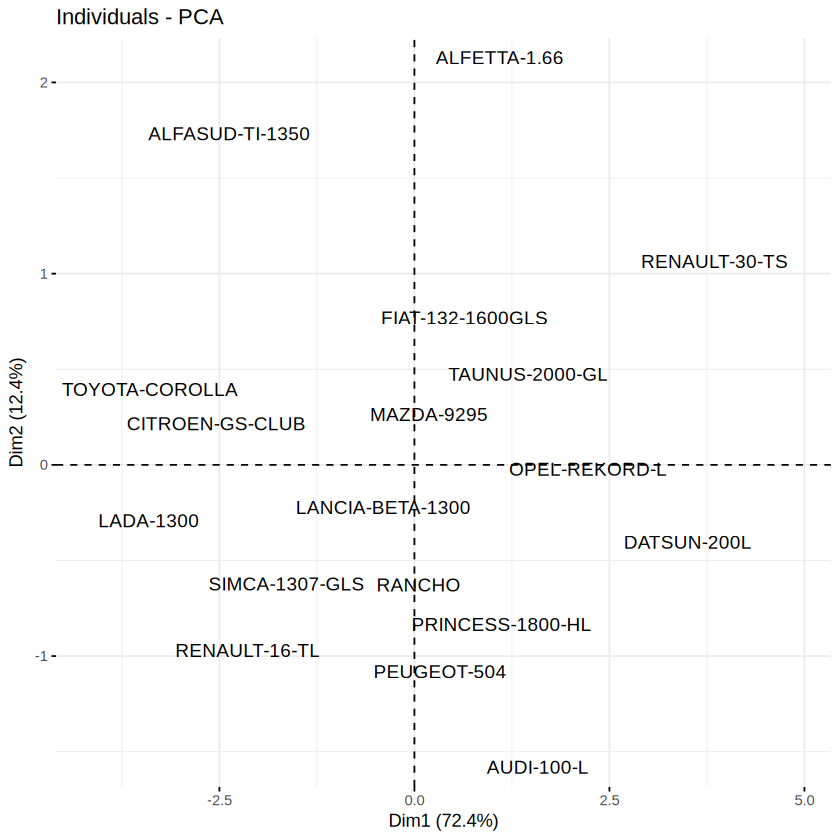

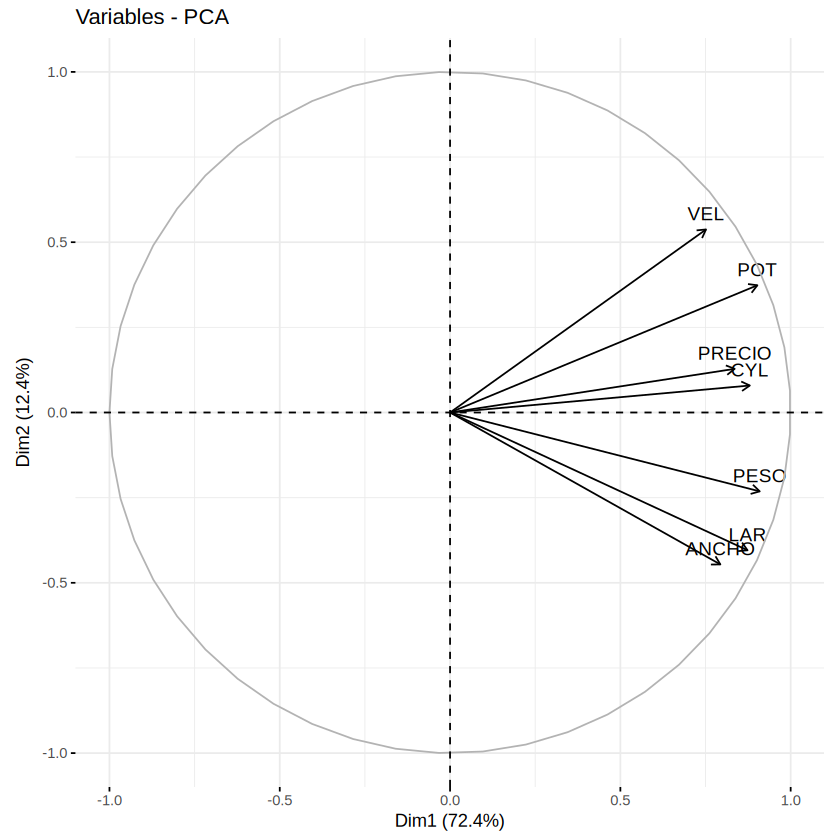

In [9]:
# Paso 6: Visualizar los resultados del análisis de componentes principales (PCA)
# Usamos la librería factoextra para graficar los individuos y las variables en los componentes principales.

# Instala factoextra si no lo tienes
# install.packages("factoextra")
library(factoextra)

# Gráfico de individuos (autos) en los dos primeros componentes principales
fviz_pca_ind(res,
             geom.ind = "text",      # Muestra los nombres de los autos
             col.ind = "black",      # Color de los nombres
             label = "all",          # Etiquetas para todos los individuos
             repel = TRUE)           # Evita que las etiquetas se sobrepongan

# Gráfico de variables en los dos primeros componentes principales
fviz_pca_var(res,
             col.var = "black",      # Color de las variables
             col.quanti.sup = "blue",# Variables cuantitativas suplementarias en azul
             legend.title = "Variables")

In [10]:
# Paso 7: Interpretar el resumen de los resultados del PCA
# Usamos la función summary() para ver la importancia de cada componente y la calidad de la representación de los autos y variables.

# Muestra el resumen del análisis de componentes principales
summary(res)


Call:
PCA(X = Dataset.PCA, scale.unit = TRUE, ncp = 5, quali.sup = c(8:8),  
     graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               5.070   0.867   0.454   0.323   0.163   0.082   0.041
% of var.             72.428  12.389   6.490   4.613   2.327   1.164   0.589
Cumulative % of var.  72.428  84.817  91.307  95.920  98.247  99.411 100.000

Individuals (the 10 first)
                     Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
ALFASUD-TI-1350  |  2.922 | -2.186  5.237  0.560 |  1.806 20.901  0.382 |
AUDI-100-L       |  2.740 |  1.771  3.437  0.418 | -1.507 14.540  0.302 |
SIMCA-1307-GLS   |  1.634 | -1.310  1.880  0.643 | -0.699  3.127  0.183 |
CITROEN-GS-CLUB  |  2.763 | -2.734  8.193  0.979 |  0.140  0.126  0.003 |
FIAT-132-1600GLS |  1.087 |  0.451  0.223  0.172 |  0.692  3.070  0.405 |
LANCIA-BETA-1300 |  1.085 | -0.206  0.046  0.036 | -0.146  0.137  0.018 |
PEUGEOT-504      |  1.264 |  0.51

In [11]:
# Paso 8: Eliminar el objeto Dataset.PCA para liberar memoria

remove(Dataset.PCA)

In [12]:
# Paso 9: Repetir el PCA y realizar una clasificación jerárquica (HCPC)
# HCPC combina PCA y análisis de clusters para identificar grupos de autos con características similares.

# Selecciona las variables para PCA
Dataset.PCA <- Dataset[, c("CYL", "POT", "LAR", "ANCHO", "PESO", "VEL", "PRECIO", "LUJO")]

# Realiza el PCA
res <- PCA(Dataset.PCA, scale.unit=TRUE, ncp=5, quali.sup=c(8:8), graph=FALSE)

# Realiza la clasificación jerárquica sobre los componentes principales
res.hcpc <- HCPC(res, nb.clust=-1, consol=FALSE, min=2, max=10, graph=TRUE)

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


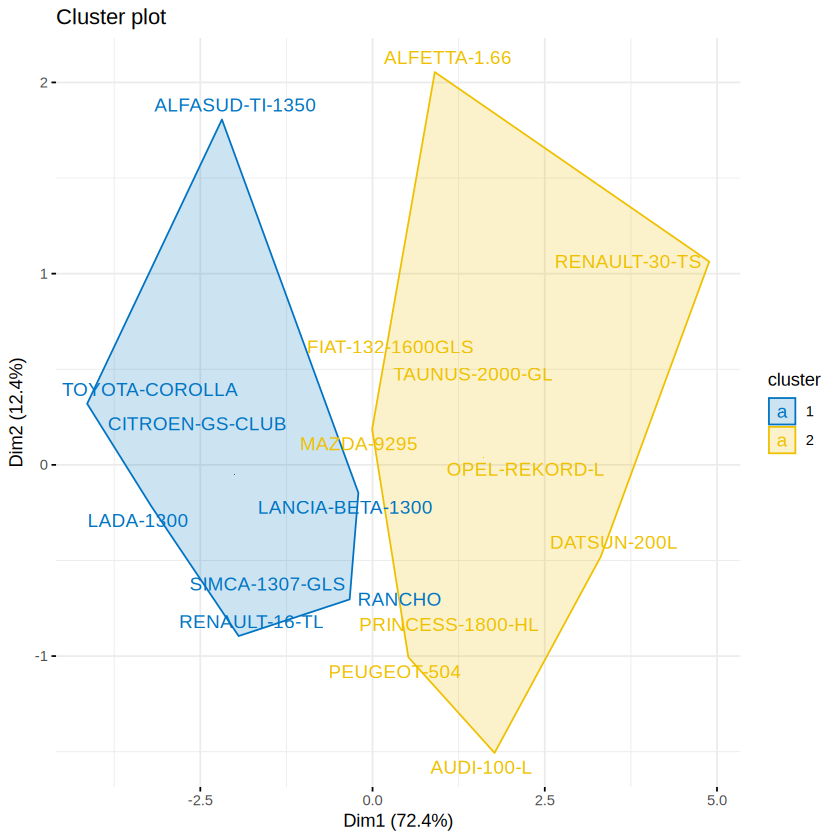

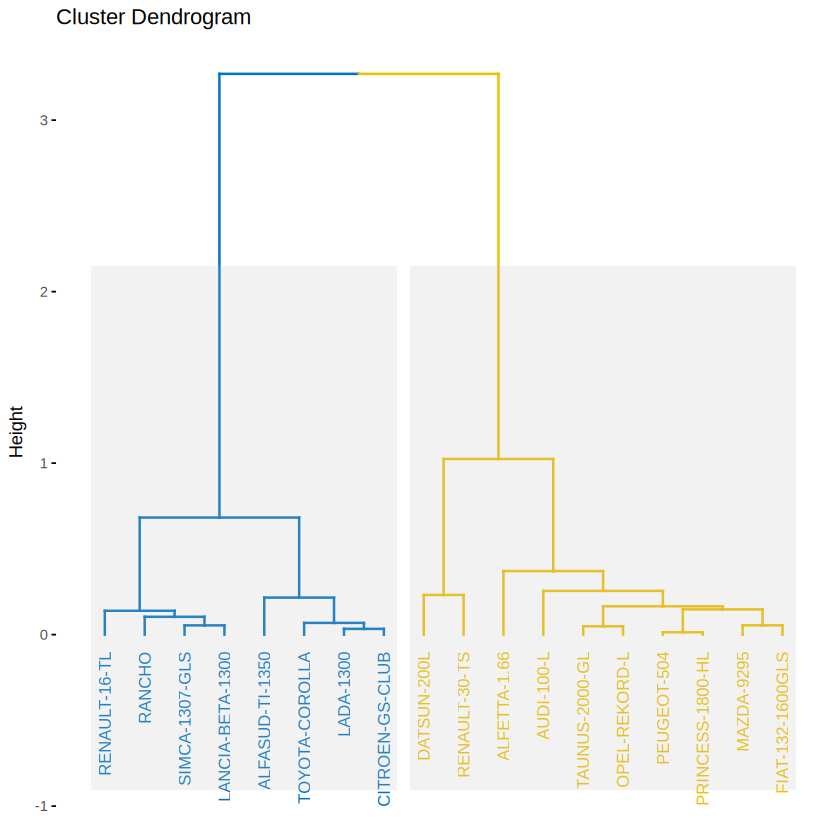

In [13]:
# Paso 10: Visualizar los resultados del HCPC (clustering sobre PCA)
# Usamos factoextra para mostrar los grupos identificados por HCPC.

# Instala factoextra si no lo tienes
# install.packages("factoextra")
library(factoextra)

# Gráfico de los clústeres en el espacio de los dos primeros componentes principales
fviz_cluster(res.hcpc,
             geom = "text",         # Muestra los nombres de los autos
             palette = "jco",       # Paleta de colores para los grupos
             repel = TRUE,          # Evita que las etiquetas se sobrepongan
             show.clust.cent = TRUE,# Muestra los centros de los clústeres
             ggtheme = theme_minimal())

# Opcional: Visualiza el dendrograma de los clústeres
fviz_dend(res.hcpc,
          cex = 0.7,
          palette = "jco",
          rect = TRUE,
          rect_fill = TRUE)

In [14]:
# Paso 11: Interpretar los grupos obtenidos por HCPC
# Analiza las características de cada clúster y observa qué autos pertenecen a cada grupo.

# Muestra el resumen de los clústeres
summary(res.hcpc)

# Visualiza los autos asignados a cada grupo
res.hcpc$data.clust

           Length Class      Mode
data.clust 9      data.frame list
desc.var   3      catdes     list
desc.axes  3      catdes     list
desc.ind   2      -none-     list
call       7      -none-     list

,CYL,POT,LAR,ANCHO,PESO,VEL,PRECIO,LUJO,clust
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
ALFASUD-TI-1350,1350,79,393,161,870,165,30570,B,1
AUDI-100-L,1588,85,468,177,1110,160,39990,MB,2
SIMCA-1307-GLS,1294,68,424,168,1050,152,29600,P,1
CITROEN-GS-CLUB,1222,59,412,161,930,151,28250,P,1
FIAT-132-1600GLS,1585,98,439,164,1105,165,34900,B,2
LANCIA-BETA-1300,1297,82,429,169,1080,160,35480,MB,1
PEUGEOT-504,1796,79,449,169,1160,154,32300,B,2
RENAULT-16-TL,1565,55,424,163,1010,140,32000,B,1
RENAULT-30-TS,2664,128,452,173,1320,180,47700,MB,2


In [15]:
# Paso 12: Guardar los resultados del análisis de clústeres para futuras consultas

# Guarda la asignación de autos a cada grupo en un archivo CSV
write.csv(res.hcpc$data.clust, "autos_clust.csv")

# Guarda el resumen de los clústeres en un archivo de texto
sink("resumen_clust.txt")
print(summary(res.hcpc))
sink()